In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/rfd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
#mounting
try:
    from google.colab import drive
    drive.mount('/content/drive')
    IN_COLAB = True
except:
    IN_COLAB = False
    
if IN_COLAB:
  parentdir = '/content/drive/MyDrive/modules/2.2/2.2-Language P-2/ASSESSMENT/propaganda_dataset_v2'


In [33]:
# set up paths
parentdir = "./propaganda_dataset_v2"
train_file= "propaganda_train.tsv"
val_file= "propaganda_val.tsv"

train_path=os.path.join(parentdir,train_file)
val_path=os.path.join(parentdir,val_file)

In [34]:
# import data

train_df=pd.read_csv(train_path,delimiter="\t",quotechar='|')
train_df.head(20)
print(train_df.shape)

val_df=pd.read_csv(val_path,delimiter="\t",quotechar='|')
val_df.head(20)
print(val_df.shape)

(2560, 2)
(640, 2)


/var/folders/bl/31xztvt94dv9bx23976lfvxh0000gn/T/ipykernel_64100/4213270249.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=label_counts, palette=palette, ax=ax1)
/var/folders/bl/31xztvt94dv9bx23976lfvxh0000gn/T/ipykernel_64100/4213270249.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=90)  # Rotate x-axis labels by 90 degrees
/var/folders/bl/31xztvt94dv9bx23976lfvxh0000gn/T/ipykernel_64100/4213270249.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_prop, y=counts_prop, palette=palette_prop, ax=ax2)
/var/folders/bl/31xztvt94dv9bx23976lf

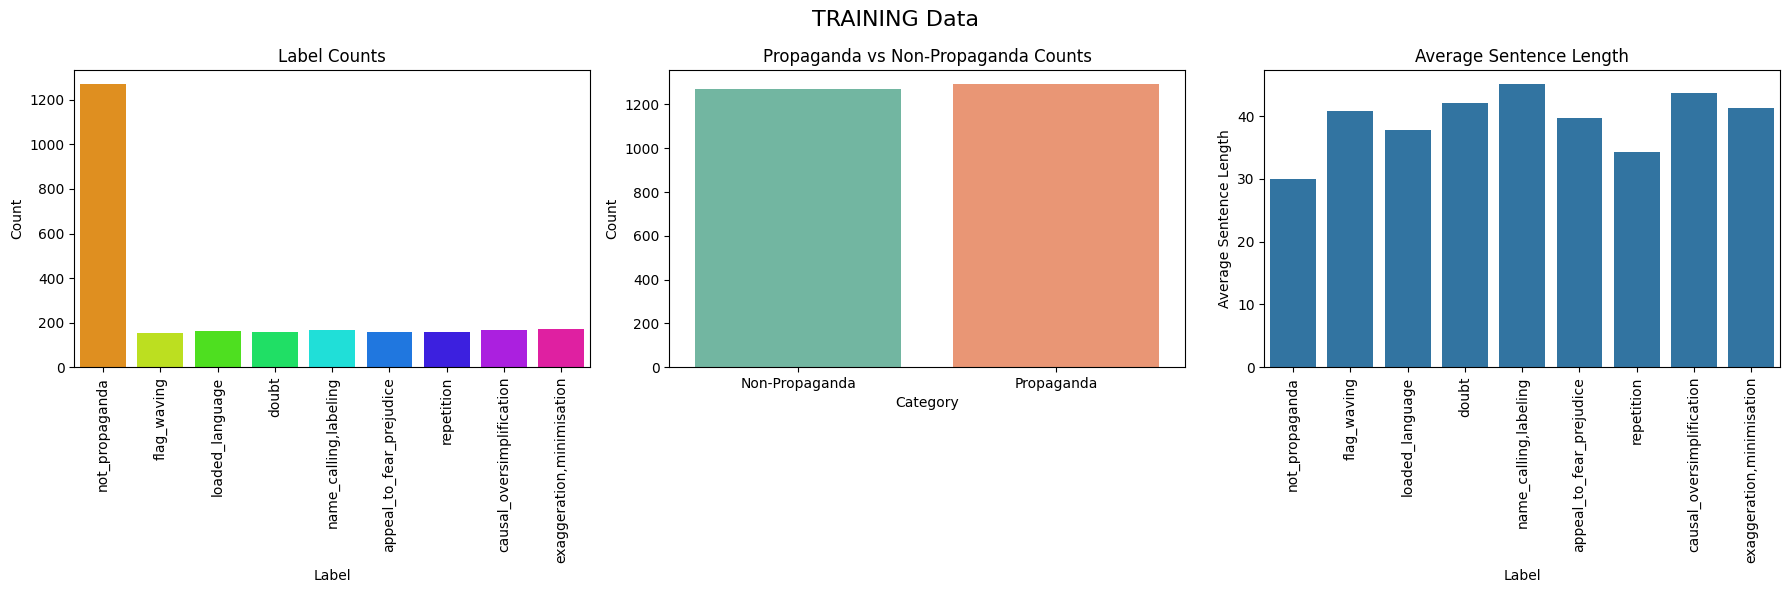

/var/folders/bl/31xztvt94dv9bx23976lfvxh0000gn/T/ipykernel_64100/4213270249.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=label_counts, palette=palette, ax=ax1)
/var/folders/bl/31xztvt94dv9bx23976lfvxh0000gn/T/ipykernel_64100/4213270249.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=90)  # Rotate x-axis labels by 90 degrees
/var/folders/bl/31xztvt94dv9bx23976lfvxh0000gn/T/ipykernel_64100/4213270249.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_prop, y=counts_prop, palette=palette_prop, ax=ax2)
/var/folders/bl/31xztvt94dv9bx23976lf

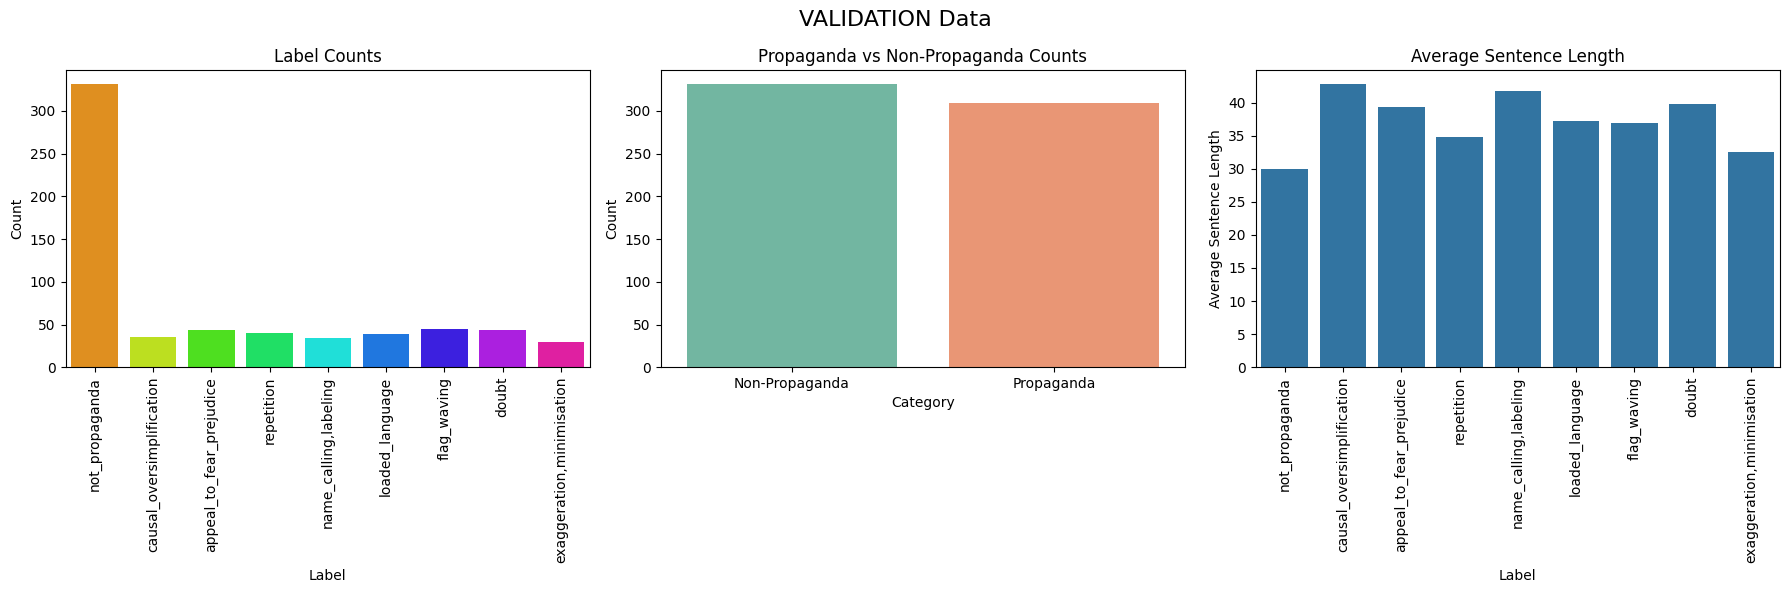

In [20]:
def show_class_distros(dataframe, data_type='unspecified'):
    labels = dataframe["label"].unique()
    label_counts = [len(dataframe[dataframe["label"]==label]) for label in labels]
    
    # Create a color palette with a unique color for each bar
    palette = sns.color_palette("hsv", len(labels))
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the figure size as needed
    fig.suptitle(f'{data_type} Data', fontsize=16)  # Add the figure title
    
    # Create the first barplot
    sns.barplot(x=labels, y=label_counts, palette=palette, ax=ax1)
    ax1.set_xlabel('Label')
    ax1.set_ylabel('Count')
    ax1.set_title('Label Counts')
    ax1.set_xticklabels(labels, rotation=90)  # Rotate x-axis labels by 90 degrees
    
    # Create the second barplot for propaganda vs non-propaganda
    non_propaganda_count = len(dataframe[dataframe["label"] == "not_propaganda"])
    propaganda_count = len(dataframe) - non_propaganda_count
    labels_prop = ["Non-Propaganda", "Propaganda"]
    counts_prop = [non_propaganda_count, propaganda_count]
    palette_prop = sns.color_palette("Set2", 2)  # Choose a different color palette
    sns.barplot(x=labels_prop, y=counts_prop, palette=palette_prop, ax=ax2)
    ax2.set_xlabel('Category')
    ax2.set_ylabel('Count')
    ax2.set_title('Propaganda vs Non-Propaganda Counts')
    
    # Create the third barplot for average sentence length
    sents_lists = []
    av_sent_lengths = []
    for label in labels:
        sents_lists.append((label, dataframe[dataframe["label"]==label]['tagged_in_context']))
    for label, sents in sents_lists:
        label_sent_total_length = sum([len(word_tokenize(sent)) for sent in sents])
        label_av_sent_len = label_sent_total_length / len(sents)
        av_sent_lengths.append((label, label_av_sent_len))
    labels, av_sent_lengths = zip(*av_sent_lengths)
    sns.barplot(x=labels, y=av_sent_lengths, ax=ax3)
    ax3.set_xlabel('Label')
    ax3.set_ylabel('Average Sentence Length')
    ax3.set_title('Average Sentence Length')
    ax3.set_xticklabels(labels, rotation=90)  # Rotate x-axis labels by 90 degrees
    
    plt.tight_layout()
    plt.show()

    
    
show_class_distros(train_df, 'TRAINING')
show_class_distros(val_df, 'VALIDATION')

In [76]:
# functions for transforming dataframe

def get_snippet_from_sentence(single_sent):
  tokenized_sent = word_tokenize(single_sent)
  # print(tokenized_sent)
  start_idx = None
  end_idx = None
  for i, item in enumerate(tokenized_sent):
    if item == 'BOS':
      start_idx = i+2
    if item =='EOS':
      end_idx = i -1
  if start_idx is None or end_idx is None:
    raise ValueError("No BOS or EOS tags found in the sentence.")

  snippet = tokenized_sent[start_idx:end_idx]
  # print(snippet)
  # print(len(snippet))
  return snippet

def get_snippet_string_from_sentence(single_sent):
    pattern = r'<BOS>(.*?)<EOS>'
    matches = re.findall(pattern, single_sent)
    return matches[0].strip()
  

def remove_tags_from_sentence(single_sent):
    tokenized_sent = word_tokenize(single_sent)

    tokenized_sent = [tokenized_sent[i] for i in range(len(tokenized_sent)) if (i == 0 or tokenized_sent[i-1] != 'BOS') and tokenized_sent[i] != 'BOS' and (i == len(tokenized_sent)-1 or tokenized_sent[i+1] != 'BOS')]
    tokenized_sent = [tokenized_sent[i] for i in range(len(tokenized_sent)) if (i == 0 or tokenized_sent[i-1] != 'EOS') and tokenized_sent[i] != 'EOS' and (i == len(tokenized_sent)-1 or tokenized_sent[i+1] != 'EOS')]

    return tokenized_sent


def get_sentences_av_snippet_len(list_of_sents):
  no_sents = len(list_of_sents)
  total_snippet_length = sum([len(get_snippet_from_sentence(single_sent)) for single_sent in list_of_sents])
  return total_snippet_length / no_sents


def transform_strip_tag_and_tokenize(row):
    new_value = remove_tags_from_sentence(row['original'])
    return new_value
  
def transform_strip_tag(row):
    sent = row['original']
    cleaned_string = sent.replace("<BOS>", "")
    cleaned_string = cleaned_string.replace("<EOS>", "")
    return cleaned_string

def transform_extract_snippet_tokens(row):
    new_value = get_snippet_from_sentence(row['original'])
    return new_value

def transform_extract_snippet_string(row):
    new_value = get_snippet_string_from_sentence(row['original'])
    return new_value

def transform_get_snippet_length_tokens(row):
    new_value = len(row['snippet_tokenised'])
    return new_value
def transform_get_sent_length_tokens(row):
    new_value = len(row['sentence_tokenised_no_tags'])
    return new_value
  
def transform_get_snippet_length_chars(row):
    new_value = len(row['snippet_original'])
    return new_value
  
def transform_get_sent_length_chars(row):
    new_value = len(row['original_sentence_no_tags'])
    return new_value
  
def transform_binaryify(row):
    new_value = 0 if row['snippet_label'] == 'not_propaganda' else 1
    return new_value

def transform_df(dataframe):
    transformed_df = dataframe.copy()

    # Apply the transformation and create a new column
    transformed_df['original'] = transformed_df["tagged_in_context"]
    del transformed_df["tagged_in_context"]
    transformed_df['snippet_label'] = transformed_df["label"]
    del transformed_df["label"]
    transformed_df['sentence_tokenised_no_tags'] = transformed_df.apply(transform_strip_tag_and_tokenize, axis=1)
    transformed_df['original_sentence_no_tags'] = transformed_df.apply(transform_strip_tag, axis=1)
    transformed_df['snippet_tokenised'] = transformed_df.apply(transform_extract_snippet_tokens, axis=1)
    transformed_df['snippet_original'] = transformed_df.apply(transform_extract_snippet_string, axis=1)
    
    
    transformed_df['snippet_len_tokens'] = transformed_df.apply(transform_get_snippet_length_tokens, axis=1)
    transformed_df['sentence_len_tokens'] = transformed_df.apply(transform_get_sent_length_tokens, axis=1)
    
    transformed_df['snippet_len_chars'] = transformed_df.apply(transform_get_snippet_length_chars, axis=1)
    transformed_df['sentence_len_chars'] = transformed_df.apply(transform_get_sent_length_chars, axis=1)
    
    transformed_df['propaganda'] = transformed_df.apply(transform_binaryify, axis=1)
    
    new_column_order = ['propaganda', 'snippet_label', 'original', 'original_sentence_no_tags', 'snippet_original', 'sentence_tokenised_no_tags','snippet_tokenised', 'sentence_len_tokens', 'sentence_len_chars', 'snippet_len_tokens','snippet_len_chars']
    transformed_df = transformed_df[new_column_order]
    

    return transformed_df

In [77]:
transformed_train_df = transform_df(train_df)
transformed_val_df = transform_df(val_df)

In [78]:
train_df.head()

,label,tagged_in_context
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,"""The Obama administration misled the <BOS> Ame..."
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


In [79]:
transformed_train_df.head()

,propaganda,snippet_label,original,original_sentence_no_tags,snippet_original,sentence_tokenised_no_tags,snippet_tokenised,sentence_len_tokens,sentence_len_chars,snippet_len_tokens,snippet_len_chars
0,0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed.","No, he will not be confirmed.",he,"[No, ,, he, will, not, be, confirmed, .]",[he],8,32,1,2
1,0,not_propaganda,This declassification effort <BOS> won’t make ...,This declassification effort won’t make thing...,won’t make things any worse than they are for ...,"[This, declassification, effort, won, ’, t, ma...","[won, ’, t, make, things, any, worse, than, th...",17,94,14,62
2,1,flag_waving,"""The Obama administration misled the <BOS> Ame...","""The Obama administration misled the American...",American people,"[``, The, Obama, administration, misled, the, ...","[American, people]",25,132,2,15
3,0,not_propaganda,“It looks like we’re capturing the demise of t...,“It looks like we’re capturing the demise of t...,and,"[“, It, looks, like, we, ’, re, capturing, the...",[and],43,203,1,3
4,0,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>","Location: Westerville, Ohio","Location: Westerville, Ohio","[Location, :, Westerville, ,, Ohio]","[Location, :, Westerville, ,, Ohio]",5,30,5,27


In [38]:
av_snippet_lengths = []

for label, sents in sents_lists:
  # print(label)
  label_snippets_av_length = get_sentences_av_snippet_len(sents)
  av_snippet_lengths.append((label, label_snippets_av_length))

av_snippet_lengths

labels, av_snip_lengths = zip(*av_snippet_lengths)

# Create the barplot
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
barplot = sns.barplot(x=av_snip_lengths, y=labels)


plt.xlabel('Count')  # Optional: customize X-axis label
plt.ylabel('Label')  # Optional: customize Y-axis label
plt.title('Avg snip length in training data')  # Optional: add a title
plt.show()



ValueError: not enough values to unpack (expected 2, got 0)

accuracy = 0.654296875


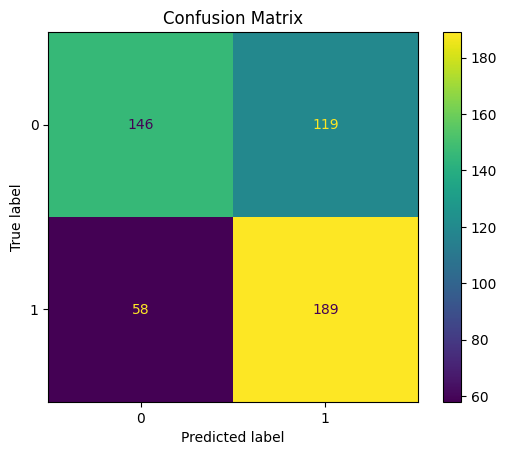

Class: 0
Precision: 0.7156862745098039
Recall: 0.5509433962264151
F1 Score: 0.6226012793176973

Class: 1
Precision: 0.6136363636363636
Recall: 0.7651821862348178
F1 Score: 0.6810810810810811

Accuracy: 0.654296875

Macro Precision: 0.6646613190730838
Macro Recall: 0.6580627912306165
Macro F1 Score: 0.6518411801993892

Micro Precision: 0.654296875
Micro Recall: 0.654296875
Micro F1 Score: 0.654296875

Weighted Precision: 0.666455165162656
Weighted Recall: 0.654296875
Weighted F1 Score: 0.6508132149340172


In [67]:
# BINARY CLASSIFICATION PROP NOT PROP (SENTS)

binary_train_df = train_df.drop(labels='label', axis = 1)
binary_train_df.head()
binary_labels = binary_train_df['propaganda']
binary_sents = binary_train_df['untagged_non_tokenized_sentence']
X_train_sents, X_test_sents, y_train_sents, y_test_sents = train_test_split(binary_sents, binary_labels, test_size=0.2, random_state=42)

vectorizer_sents=CountVectorizer(stop_words='english')
vectorizer_sents.fit(X_train_sents)
vectorised_sents = vectorizer_sents.transform(X_train_sents)

classifier_sents=MultinomialNB()
classifier_sents.fit(vectorised_sents,y_train_sents)

vectorised_test_sents = vectorizer_sents.transform(X_test_sents)

predictions_sents = classifier_sents.predict(vectorised_test_sents)

count = 0
correct = 0

for i, val in enumerate(predictions_sents):
  count += 1
  if val == list(y_test_sents)[i]:
    correct += 1

print(f"accuracy = {correct/count}")

predictions_sents = classifier_sents.predict(vectorised_test_sents)

# Generate confusion matrix
conf_matrix_sents = confusion_matrix(y_test_sents, predictions_sents)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sents, display_labels=classifier_sents.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision for each class
precision_per_class = precision_score(y_test_sents, predictions_sents, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_sents, predictions_sents, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_sents, predictions_sents, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_sents.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_sents, predictions_sents)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_sents, predictions_sents, average='macro')
recall_macro = recall_score(y_test_sents, predictions_sents, average='macro')
f1_macro = f1_score(y_test_sents, predictions_sents, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_sents, predictions_sents, average='micro')
recall_micro = recall_score(y_test_sents, predictions_sents, average='micro')
f1_micro = f1_score(y_test_sents, predictions_sents, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_sents, predictions_sents, average='weighted')
recall_weighted = recall_score(y_test_sents, predictions_sents, average='weighted')
f1_weighted = f1_score(y_test_sents, predictions_sents, average='weighted')

# Print the scores

print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

Vocabulary:  {'strong': 3719, 'action': 104, 'at': 353, 'totally': 3945, 'conflicted': 802, 'to': 3928, 'replace': 3241, 'outgoing': 2749, 'supreme': 3775, 'video': 4141, 'https': 1881, 'co': 725, 'laucjertnc': 2220, 'news4sa': 2585, 'kabbfox29': 2160, 'pic': 2869, 'twitter': 4015, 'com': 736, 'akznsp4ps8': 175, 'she': 3517, 'is': 2089, 'compete': 762, 'with': 4285, 'the': 3865, 'great': 1718, 'economist': 1244, 'banning': 411, 'situation': 3574, 'first': 1545, 'responders': 3273, 'who': 4253, 'are': 297, 'headed': 1790, 'in': 1951, 'equipment': 1352, 'treason': 3971, 'were': 4236, 'targeted': 3825, 'for': 1580, 'removal': 3231, 'either': 1264, 'because': 433, 'they': 3880, 'jewish': 2125, 'or': 2716, 'he': 1788, 'had': 1751, 'that': 3864, 'written': 4322, 'down': 1200, 'and': 235, 'figured': 1525, 'out': 2745, 'so': 3596, 'would': 4312, 'know': 2192, 'where': 4245, 'shoot': 3527, 'hit': 1839, 'autonomy': 389, 'guardian': 1737, 'silently': 3558, 'edited': 1249, 'story': 3708, 'steinle'

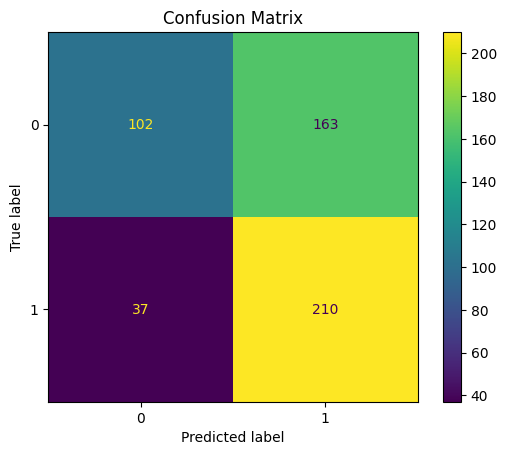

Class: 0
Precision: 0.7338129496402878
Recall: 0.3849056603773585
F1 Score: 0.504950495049505

Class: 1
Precision: 0.5630026809651475
Recall: 0.8502024291497976
F1 Score: 0.6774193548387096

Accuracy: 0.609375

Macro Precision: 0.6484078153027176
Macro Recall: 0.6175540447635781
Macro F1 Score: 0.5911849249441072

Micro Precision: 0.609375
Micro Recall: 0.609375
Micro F1 Score: 0.609375

Weighted Precision: 0.6514103395567727
Weighted Recall: 0.609375
Weighted F1 Score: 0.5881532457681251


In [68]:
# BINARY CLASS SNIPS

binary_train_df.head()
binary_labels = binary_train_df['propaganda']
binary_snips = binary_train_df['joined_snippet']
X_train_snips, X_test_snips, y_train_snips, y_test_snips = train_test_split(binary_snips, binary_labels, test_size=0.2, random_state=42)

vectorizer_snips=CountVectorizer()
vectorizer_snips.fit(X_train_snips)
vectorised_snips = vectorizer_snips.transform(X_train_snips)

print("Vocabulary: ", vectorizer_snips.vocabulary_)
print(len( vectorizer_snips.vocabulary_))
print(vectorised_snips.shape)
classifier_snips=MultinomialNB()
classifier_snips.fit(vectorised_snips,y_train_snips)
vectorised_test_snips = vectorizer_snips.transform(X_test_snips)

predictions_snips = classifier_snips.predict(vectorised_test_snips)

count = 0
correct = 0

for i, val in enumerate(predictions_snips):
  count += 1
  if val == list(y_test_snips)[i]:
    correct += 1

print(f"accuracy = {correct/count}")



predictions_snips = classifier_snips.predict(vectorised_test_snips)

# Generate confusion matrix
conf_matrix_snips = confusion_matrix(y_test_snips, predictions_snips)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_snips, display_labels=classifier_snips.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision for each class
precision_per_class = precision_score(y_test_snips, predictions_snips, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_snips, predictions_snips, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_snips, predictions_snips, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_snips.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_snips, predictions_snips)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_snips, predictions_snips, average='macro')
recall_macro = recall_score(y_test_snips, predictions_snips, average='macro')
f1_macro = f1_score(y_test_snips, predictions_snips, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_snips, predictions_snips, average='micro')
recall_micro = recall_score(y_test_snips, predictions_snips, average='micro')
f1_micro = f1_score(y_test_snips, predictions_snips, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_snips, predictions_snips, average='weighted')
recall_weighted = recall_score(y_test_snips, predictions_snips, average='weighted')
f1_weighted = f1_score(y_test_snips, predictions_snips, average='weighted')

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

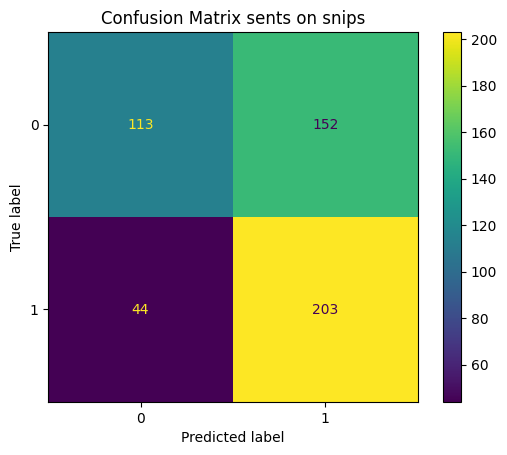

Class: 0
Precision: 0.7197452229299363
Recall: 0.42641509433962266
F1 Score: 0.5355450236966824

Class: 1
Precision: 0.571830985915493
Recall: 0.8218623481781376
F1 Score: 0.6744186046511628

Accuracy: 0.6171875

Macro Precision: 0.6457881044227146
Macro Recall: 0.6241387212588801
Macro F1 Score: 0.6049818141739226

Micro Precision: 0.6171875
Micro Recall: 0.6171875
Micro F1 Score: 0.6171875

Weighted Precision: 0.6483881593702341
Weighted Recall: 0.6171875
Weighted F1 Score: 0.6025406770087072


In [69]:
# sentence on snips

vectorised_snips_as_sents = vectorizer_sents.transform(X_train_snips)
vectorised_test_snips_as_sents = vectorizer_sents.transform(X_test_snips)

preds_1 = classifier_sents.predict(vectorised_test_snips_as_sents)
# Generate confusion matrix
conf_matrix_1 = confusion_matrix(y_test_snips, preds_1)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_1, display_labels=classifier_snips.classes_)
disp.plot()
plt.title('Confusion Matrix sents on snips')
plt.show()

# Calculate Precision for each class
precision_per_class = precision_score(y_test_snips, preds_1, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_snips, preds_1, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_snips, preds_1, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_sents.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_snips, preds_1)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_snips, preds_1, average='macro')
recall_macro = recall_score(y_test_snips, preds_1, average='macro')
f1_macro = f1_score(y_test_snips, preds_1, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_snips, preds_1, average='micro')
recall_micro = recall_score(y_test_snips, preds_1, average='micro')
f1_micro = f1_score(y_test_snips, preds_1, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_snips, preds_1, average='weighted')
recall_weighted = recall_score(y_test_snips, preds_1, average='weighted')
f1_weighted = f1_score(y_test_snips, preds_1, average='weighted')

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

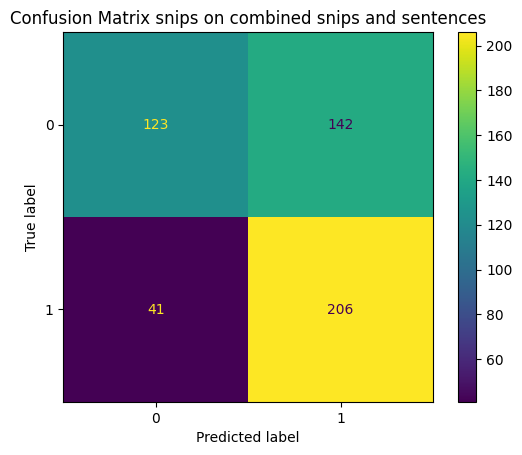

Class: 0
Precision: 0.75
Recall: 0.4641509433962264
F1 Score: 0.5734265734265734

Class: 1
Precision: 0.5919540229885057
Recall: 0.8340080971659919
F1 Score: 0.692436974789916

Accuracy: 0.642578125

Macro Precision: 0.6709770114942528
Macro Recall: 0.6490795202811092
Macro F1 Score: 0.6329317741082447

Micro Precision: 0.642578125
Micro Recall: 0.642578125
Micro F1 Score: 0.642578125

Weighted Precision: 0.6737551634339081
Weighted Recall: 0.642578125
Weighted F1 Score: 0.6308397943967797


In [70]:
# snips on sentence

vectorised_sents_as_snips = vectorizer_snips.transform(X_train_sents)
vectorised_test_sents_as_snips = vectorizer_snips.transform(X_test_sents)

preds_2 = classifier_snips.predict(vectorised_test_sents_as_snips)
# Generate confusion matrix
conf_matrix_2 = confusion_matrix(y_test_sents, preds_2)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_2, display_labels=classifier_sents.classes_)
disp.plot()
plt.title('Confusion Matrix snips on combined snips and sentences')
plt.show()

# Calculate Precision for each class
precision_per_class = precision_score(y_test_sents, preds_2, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_sents, preds_2, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_sents, preds_2, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_snips.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_sents, preds_2)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_sents, preds_2, average='macro')
recall_macro = recall_score(y_test_sents, preds_2, average='macro')
f1_macro = f1_score(y_test_sents, preds_2, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_sents, preds_2, average='micro')
recall_micro = recall_score(y_test_sents, preds_2, average='micro')
f1_micro = f1_score(y_test_sents, preds_2, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_sents, preds_2, average='weighted')
recall_weighted = recall_score(y_test_sents, preds_2, average='weighted')
f1_weighted = f1_score(y_test_sents, preds_2, average='weighted')

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

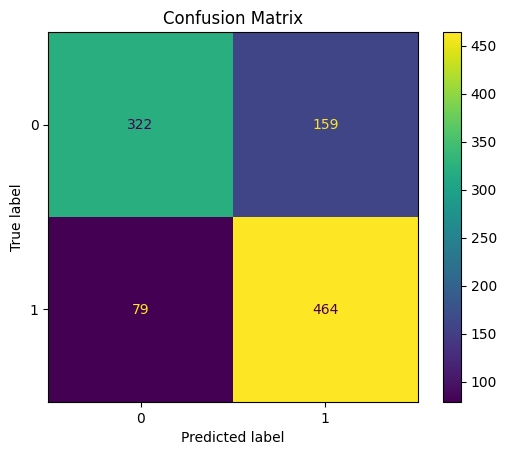

Class: 0
Precision: 0.8029925187032418
Recall: 0.6694386694386695
F1 Score: 0.7301587301587301

Class: 1
Precision: 0.7447833065810594
Recall: 0.85451197053407
F1 Score: 0.7958833619210978

Accuracy: 0.767578125

Macro Precision: 0.7738879126421506
Macro Recall: 0.7619753199863697
Macro F1 Score: 0.7630210460399139

Micro Precision: 0.767578125
Micro Recall: 0.767578125
Micro F1 Score: 0.767578125

Weighted Precision: 0.7721257196970455
Weighted Recall: 0.767578125
Weighted F1 Score: 0.7650107565717825


In [71]:
# combined

binary_train_df = train_df.drop(labels='label', axis = 1)
binary_train_df.head()

combined_df = pd.concat([train_df['untagged_non_tokenized_sentence'], train_df['joined_snippet']])
combined_df.reset_index(drop=True, inplace=True)

combined_df
propaganda_series = pd.concat([train_df['propaganda'], train_df['propaganda']])
propaganda_series.reset_index(drop=True, inplace=True)

combined_df = pd.concat([combined_df, propaganda_series], axis=1)
combined_df.columns = ['combined_snippets_and_non_tokenized_sentence', 'propaganda']

combined_df

binary_labels = combined_df['propaganda']
features = combined_df['combined_snippets_and_non_tokenized_sentence']
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(features, binary_labels, test_size=0.2, random_state=42)

vectorizer_combined=CountVectorizer()
vectorizer_combined.fit(X_train_combined)
vectorised_combined = vectorizer_combined.transform(X_train_combined)

classifier_combined=MultinomialNB()
classifier_combined.fit(vectorised_combined,y_train_combined)
vectorised_test_combined = vectorizer_combined.transform(X_test_combined)

predictions_combined = classifier_combined.predict(vectorised_test_combined)

# Generate confusion matrix
conf_matrix_combined = confusion_matrix(y_test_combined, predictions_combined)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_combined, display_labels=classifier_combined.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Assuming y_test_combined are the true labels and predictions_combined are the predictions from your classifier

# Calculate Precision for each class
precision_per_class = precision_score(y_test_combined, predictions_combined, average=None)

# Calculate Recall for each class
recall_per_class = recall_score(y_test_combined, predictions_combined, average=None)

# Calculate F1 Score for each class
f1_score_per_class = f1_score(y_test_combined, predictions_combined, average=None)

# Display the scores for each class
for i, class_label in enumerate(classifier_combined.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]}")
    print(f"Recall: {recall_per_class[i]}")
    print(f"F1 Score: {f1_score_per_class[i]}\n")
    
    
# Calculate accuracy - no need for average, as accuracy is inherently a macro-average metric
accuracy = accuracy_score(y_test_combined, predictions_combined)

# Calculate precision, recall, and F1-score with macro averaging
precision_macro = precision_score(y_test_combined, predictions_combined, average='macro')
recall_macro = recall_score(y_test_combined, predictions_combined, average='macro')
f1_macro = f1_score(y_test_combined, predictions_combined, average='macro')

# Calculate precision, recall, and F1-score with micro averaging
precision_micro = precision_score(y_test_combined, predictions_combined, average='micro')
recall_micro = recall_score(y_test_combined, predictions_combined, average='micro')
f1_micro = f1_score(y_test_combined, predictions_combined, average='micro')

# Calculate precision, recall, and F1-score with weighted average
precision_weighted = precision_score(y_test_combined, predictions_combined, average='weighted')
recall_weighted = recall_score(y_test_combined, predictions_combined, average='weighted')
f1_weighted = f1_score(y_test_combined, predictions_combined, average='weighted')

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"\nMacro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1 Score: {f1_macro}\n")
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1 Score: {f1_micro}\n")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")

In [42]:
import re

def get_snippet_string_from_sentence(single_sent):
    pattern = r'<BOS>(.*?)<EOS>'
    matches = re.findall(pattern, single_sent)
    return matches[0].strip()

get_snippet_string_from_sentence("a test of the <BOS> capability of it <EOS> of this shit")


'capability of it'